# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [25]:
import sys
sys.path.insert(0,'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from losses import TripletLoss
from trainer import fit
import torchvision
import timm
from IPython.display import clear_output 
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE
from torch import nn
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

# استفاده از مدل EfficientNet به جای MobileNetv2 برای استخراج ویژگی‌ها
embedding_net =EfficientNetB4() #timm.create_model('efficientnet_b0', pretrained=True)  # استفاده از مدل EfficientNet
siamese_model = TripletNet(embedding_net=embedding_net)

optimizer = torch.optim.Adam(siamese_model.parameters(), lr=1e-4)  # تغییر به Adam برای بهبود عملکرد
lr_scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)  # استفاده از Cosine Annealing برای تغییر نرخ یادگیری
loss_fn = TripletLoss(1.)
n_epochs = 100  # تعداد epochs
device = torch.cuda.is_available()

if device:
    siamese_model.cuda()

Loaded pretrained weights for efficientnet-b4


***Import some libs***

In [26]:
# بارگذاری داده‌ها
path_data = 'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())




***Define model hiperparams***

In [27]:

# آموزش مدل Siamese
fit(triplet_train_loader, triplet_val_loader, siamese_model, loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval=10)


Train: [0/225 (0%)]	Loss: 1.011379
Train: [50/225 (22%)]	Loss: 0.833505
Train: [100/225 (44%)]	Loss: 0.786644
Train: [150/225 (67%)]	Loss: 0.737439
Train: [200/225 (89%)]	Loss: 0.674816
Epoch: 1/100. Train set: Average loss: 0.7615
Epoch: 1/100. Validation set: Average loss: 0.7490
Estimated time of epoch: 57.73 s
ETA:96.22 min
Train: [0/225 (0%)]	Loss: 0.401873
Train: [50/225 (22%)]	Loss: 0.672567
Train: [100/225 (44%)]	Loss: 0.638669
Train: [150/225 (67%)]	Loss: 0.617081
Train: [200/225 (89%)]	Loss: 0.612824
Epoch: 2/100. Train set: Average loss: 0.6134
Epoch: 2/100. Validation set: Average loss: 0.6488
Estimated time of epoch: 57.6 s
ETA:95.04 min
Train: [0/225 (0%)]	Loss: 0.601027
Train: [50/225 (22%)]	Loss: 0.535058
Train: [100/225 (44%)]	Loss: 0.476019
Train: [150/225 (67%)]	Loss: 0.456083
Train: [200/225 (89%)]	Loss: 0.349653
Epoch: 3/100. Train set: Average loss: 0.4566
Epoch: 3/100. Validation set: Average loss: 0.5497
Estimated time of epoch: 58.91 s
ETA:96.22 min
Train: [0/2

Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.129759
Train: [100/225 (44%)]	Loss: 0.088635
Train: [150/225 (67%)]	Loss: 0.078816
Train: [200/225 (89%)]	Loss: 0.087334
Epoch: 26/100. Train set: Average loss: 0.0996
Epoch: 26/100. Validation set: Average loss: 0.2610
Estimated time of epoch: 56.87 s
ETA:71.09 min
Train: [0/225 (0%)]	Loss: 0.075179
Train: [50/225 (22%)]	Loss: 0.139737
Train: [100/225 (44%)]	Loss: 0.129975
Train: [150/225 (67%)]	Loss: 0.065459
Train: [200/225 (89%)]	Loss: 0.112171
Epoch: 27/100. Train set: Average loss: 0.1143
Epoch: 27/100. Validation set: Average loss: 0.2419
Estimated time of epoch: 56.11 s
ETA:69.2 min
Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.158609
Train: [100/225 (44%)]	Loss: 0.108124
Train: [150/225 (67%)]	Loss: 0.104198
Train: [200/225 (89%)]	Loss: 0.089200
Epoch: 28/100. Train set: Average loss: 0.1124
Epoch: 28/100. Validation set: Average loss: 0.2437
Estimated time of epoch: 56.86 s
ETA:69.18 min
Train

Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.069600
Train: [100/225 (44%)]	Loss: 0.022753
Train: [150/225 (67%)]	Loss: 0.054579
Train: [200/225 (89%)]	Loss: 0.066297
Epoch: 51/100. Train set: Average loss: 0.0510
Epoch: 51/100. Validation set: Average loss: 0.1922
Estimated time of epoch: 55.7 s
ETA:46.42 min
Train: [0/225 (0%)]	Loss: 0.028132
Train: [50/225 (22%)]	Loss: 0.045200
Train: [100/225 (44%)]	Loss: 0.029183
Train: [150/225 (67%)]	Loss: 0.051640
Train: [200/225 (89%)]	Loss: 0.032381
Epoch: 52/100. Train set: Average loss: 0.0389
Epoch: 52/100. Validation set: Average loss: 0.1736
Estimated time of epoch: 56.09 s
ETA:45.81 min
Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.072245
Train: [100/225 (44%)]	Loss: 0.081876
Train: [150/225 (67%)]	Loss: 0.084467
Train: [200/225 (89%)]	Loss: 0.029131
Epoch: 53/100. Train set: Average loss: 0.0595
Epoch: 53/100. Validation set: Average loss: 0.1776
Estimated time of epoch: 55.89 s
ETA:44.71 min
Train

Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.014929
Train: [100/225 (44%)]	Loss: 0.047392
Train: [150/225 (67%)]	Loss: 0.061639
Train: [200/225 (89%)]	Loss: 0.087510
Epoch: 76/100. Train set: Average loss: 0.0570
Epoch: 76/100. Validation set: Average loss: 0.1609
Estimated time of epoch: 56.32 s
ETA:23.47 min
Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.072914
Train: [100/225 (44%)]	Loss: 0.000000
Train: [150/225 (67%)]	Loss: 0.012716
Train: [200/225 (89%)]	Loss: 0.048415
Epoch: 77/100. Train set: Average loss: 0.0336
Epoch: 77/100. Validation set: Average loss: 0.1686
Estimated time of epoch: 56.42 s
ETA:22.57 min
Train: [0/225 (0%)]	Loss: 0.002047
Train: [50/225 (22%)]	Loss: 0.015014
Train: [100/225 (44%)]	Loss: 0.051008
Train: [150/225 (67%)]	Loss: 0.049644
Train: [200/225 (89%)]	Loss: 0.017911
Epoch: 78/100. Train set: Average loss: 0.0320
Epoch: 78/100. Validation set: Average loss: 0.1600
Estimated time of epoch: 56.17 s
ETA:21.53 min
Trai

In [ ]:
import torch
torch.save(siamese_model, "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/emdebbing_generator_triplet_model.h5" )
#siamese_model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/emdebbing_generator_triplet_model.h5",map_location=torch.device('cpu'))
#siamese_model.eval()

In [1]:
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
# استخراج ویژگی‌ها با استفاده از مدل Siamese
#def generate_embeddings(data_loader, model):
#    with torch.no_grad():
#        #device = 'cuda'
#        model.eval()
#        #model.to(device)
#        labels = None
#        embeddings = None
#        for batch_idx, data in tqdm(enumerate(data_loader)):
#            batch_imgs, batch_labels = data
#            batch_labels = batch_labels.numpy()
#           # batch_imgs = Variable(batch_imgs.to('cuda'))
#            batch_E = model.get_embedding(batch_imgs)
#            batch_E = batch_E.data.cpu().numpy()
#            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
#            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
#    return embeddings, labels
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    
# تعریف مدل سفارشی ViT
 
class RefinedViT(nn.Module):
    def __init__(self, original_vit_model, embedding_dim, num_classes):
        super(RefinedViT, self).__init__()
        # حذف لایه‌های ابتدایی
        self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
        #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه‌بندی
        #self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه‌بندی
        self.fc = nn.Linear(1792, num_classes)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        x = self.vit(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x  
    def get_embedding(self, x):
        # استخراج ویژگی‌ها قبل از لایه طبقه‌بندی
        with torch.no_grad():
            x = self.vit(x)  # خروجی از لایه‌های ViT
        return x

train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, 15)  # تعداد کلاس‌ها
print("loaded")
embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = RefinedViT(vit_model, embedding_dim, num_classes=15)
print("model")
# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader, siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader, siamese_model )
 
# تبدیل داده‌ها به تنسور
X_train, y_train = train_embeddings, train_labels
X_val, y_val = test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
print("data")
# انتقال مدل به دستگاه CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    model.cuda()

# تنظیمات loss function و optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # استفاده از AdamW
print("train")
# آموزش مدل
model.train()
for epoch in range(1000):  # تعداد epochs
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    lr_scheduler.step()  # اعمال تغییرات در نرخ یادگیری
    print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# ارزیابی مدل
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor.to(device))
    _, predicted = torch.max(val_outputs.data, 1)

# محاسبه دقت و امتیاز F1
accuracy = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
f1 = f1_score(y_val_tensor.cpu(), predicted.cpu(), average='weighted')
precision = precision_score(y_val_tensor.cpu(), predicted.cpu(), average='macro') 
recall = recall_score(y_val_tensor.cpu(), predicted.cpu(), average='macro')

# نمایش نتایج
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')

# ذخیره مدل
#torch.save(model.state_dict(), "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet_improved.h5")
torch.save(model , "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModel.h5")
torch.save(model.state_dict(), "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModel_State_Dict.h5")

# تابع تولید Embedding‌ها
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        model.eval()
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)  # استخراج ویژگی‌ها
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

# تابع vis_tSNE برای نمایش ویژگی‌ها
def vis_tSNE(embeddings, labels, backbone='RVit'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')

# نمایش t-SNE برای داده‌های تست
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
#val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, siamese_model)
val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

# نتیجه نهایی
print("Model training and evaluation completed.")

C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


NameError: name 'nn' is not defined

In [ ]:
import sys
sys.path.insert(0,'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
import torch
from torch import nn
import torchvision
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# تعریف مدل سفارشی ViT
 
# class RefinedViT(nn.Module):
#     def __init__(self, original_vit_model, embedding_dim, num_classes):
#         super(RefinedViT, self).__init__()
#         # حذف لایه های ابتدایی
#         self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
#         #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه‌بندی
#         self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه‌بندی
#         #self.fc = nn.Linear(1792, num_classes)
#         self.dropout = nn.Dropout(0.5)
#     def forward(self, x):
#         x = self.vit(x)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return x   
#     def get_embedding(self, x):
#         # استخراج ویژگی ها قبل از لایه طبقه بندی
#         with torch.no_grad():
#             x = self.vit(x)  # خروجی از لایه های ViT
#         return x

class RefinedViT(nn.Module):
    def __init__(self, original_vit_model,embedding_dim, num_classes):
        super(RefinedViT, self).__init__()
        # حفظ لایه های اصلی ViT
        self.num_patches = (224 // 16) * (224 // 16)  # برای تصویر 224x224 با پچ 16x16
        self.embed_dim = 768  # سایز استاندارد برای vit-base
        
        # تبدیل embedding به پچ ها
        #self.embedding_to_patch = nn.Linear(embedding_dim, self.num_patches * self.embed_dim)
        #self.embedding_to_patch = nn.Linear(1280, self.num_patches * self.embed_dim)
        self.embedding_to_patch = nn.Linear(1792, self.num_patches * self.embed_dim)
        
        # Position Embedding
        self.pos_embed = nn.Parameter(torch.zeros(1, self.num_patches + 1, self.embed_dim))
        
        # CLS Token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, self.embed_dim))
        
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.embed_dim,
            nhead=12,  # تعداد heads در self-attention
            dim_feedforward=3072,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=12)
        
        # لایه‌های نهایی
        self.norm = nn.LayerNorm(self.embed_dim)
        self.fc = nn.Linear(self.embed_dim, num_classes)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        batch_size = x.size(0)
        
        # تبدیل embedding به پچ‌ها
        x = self.embedding_to_patch(x)  # (batch_size, num_patches * embed_dim)
        x = x.view(batch_size, self.num_patches, self.embed_dim)  # (batch_size, num_patches, embed_dim)
        
        # اضافه کردن CLS token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)  # (batch_size, num_patches + 1, embed_dim)
        
        # اضافه کردن position embedding
        x = x + self.pos_embed
        
        # Transformer Encoder
        x = self.transformer_encoder(x)
        
        # استفاده از CLS token برای طبقه‌بندی
        x = x[:, 0]  # فقط CLS token
        x = self.norm(x)
        x = self.dropout(x)
        x = self.fc(x)
        
        return x    
    
siamese_model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/emdebbing_generator_triplet_model.h5",map_location=torch.device('cpu'))
siamese_model.eval()

# بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, 15)  # تعداد کلاس‌ها
print("loaded")
embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = RefinedViT(vit_model, embedding_dim, num_classes=15)
# state_dict = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModel.h5",map_location=torch.device('cpu'))
# model.load_state_dict( state_dict)
model.eval()
print("model")
# تابع تولید Embedding
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        model.eval()
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device == 'cuda':
                batch_imgs = batch_imgs.cuda()  # انتقال به GPU اگر در دسترس باشد
            batch_E = model.get_embedding(batch_imgs)  # استخراج ویژگی‌ها
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    

     
path_data = 'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

 

# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader,  siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader,  siamese_model )
 
# تبدیل داده‌ها به تنسور
X_train, y_train = train_embeddings, train_labels
X_val, y_val = test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
print("data")
# انتقال مدل به دستگاه CUDA

if torch.cuda.is_available():
    model.cuda()

# تنظیمات loss function و optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # استفاده از AdamW
lr_scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)  # استفاده از Cosine Annealing 
# آموزش مدل
model.train()
for epoch in range(1000):  # تعداد epochs
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    lr_scheduler.step()  # اعمال تغییرات در نرخ یادگیری
    print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}') 

### ارزیابی مدل
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor.to(device))
    _, predicted = torch.max(val_outputs.data, 1)

torch.save(model , "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModelLocal1.h5")
torch.save(model.state_dict(), "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModel_State_DictLocal.h5")
    
    
# محاسبه دقت و امتیاز F1
accuracy = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
f1 = f1_score(y_val_tensor.cpu(), predicted.cpu(), average='weighted')
precision = precision_score(y_val_tensor.cpu(), predicted.cpu(), average='macro') 
recall = recall_score(y_val_tensor.cpu(), predicted.cpu(), average='macro')

# نمایش نتایج
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')

 





# تابع vis_tSNE برای نمایش ویژگی ها
def vis_tSNE(embeddings, labels, backbone='RVit'):
    # تغییر شکل embeddings به (n_samples, n_features)
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)  # تبدیل به ماتریس دو بعدی
    
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    
# def vis_tSNE(embeddings, labels, backbone='RVit'):
#     num_samples = embeddings.shape[0]
#     X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
#     plt.figure(figsize=(16, 16))
#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
#     labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
#     for i in range(15):
#         inds = np.where(labels==i)[0]
#         plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
#     plt.legend(labels_name, fontsize=30)
#     plt.savefig(f'./tsne_{backbone}.png')

# نمایش t-SNE برای داده‌های تست

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

# نتیجه نهایی
print("Model training and evaluation completed.")

C:\Users\Mey\AppData\Local\Temp\ipykernel_2000\513483750.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  siamese_model = torch.load("C:/Users/Mey/Documents/PlantDiseas

loaded
model
data


C:\Users\Mey\AppData\Local\Temp\ipykernel_8200\3026343573.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnos

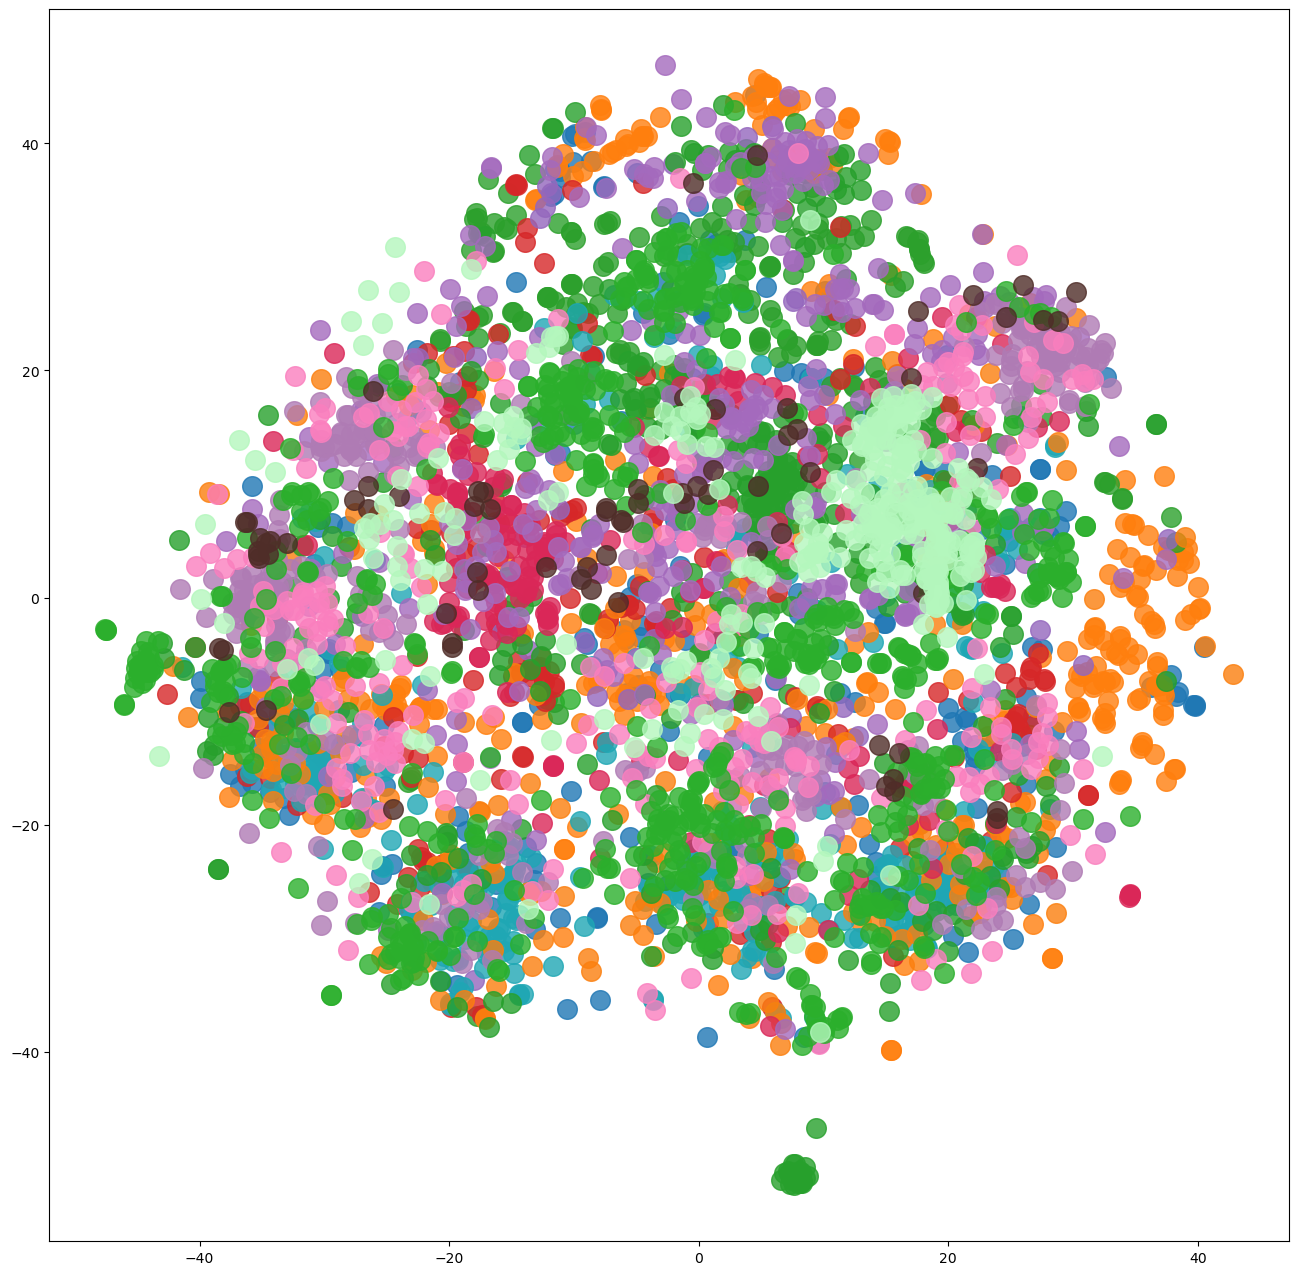

In [30]:
import os
import pandas as pd
import seaborn as sns
import torch
from torch import nn
import torchvision
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

path_data = 'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVitModelLocal.h5",map_location=torch.device('cpu'))
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet_improved_Model.h5",map_location=torch.device('cpu'))
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# تابع vis_tSNE برای نمایش ویژگی ها
def vis_tSNE(embeddings, labels, backbone='RVit'):
    # تغییر شکل embeddings به (n_samples, n_features)
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)  # تبدیل به ماتریس دو بعدی
    
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
#     plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    
val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

C:\Users\Mey\AppData\Local\Temp\ipykernel_8200\216685668.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosi

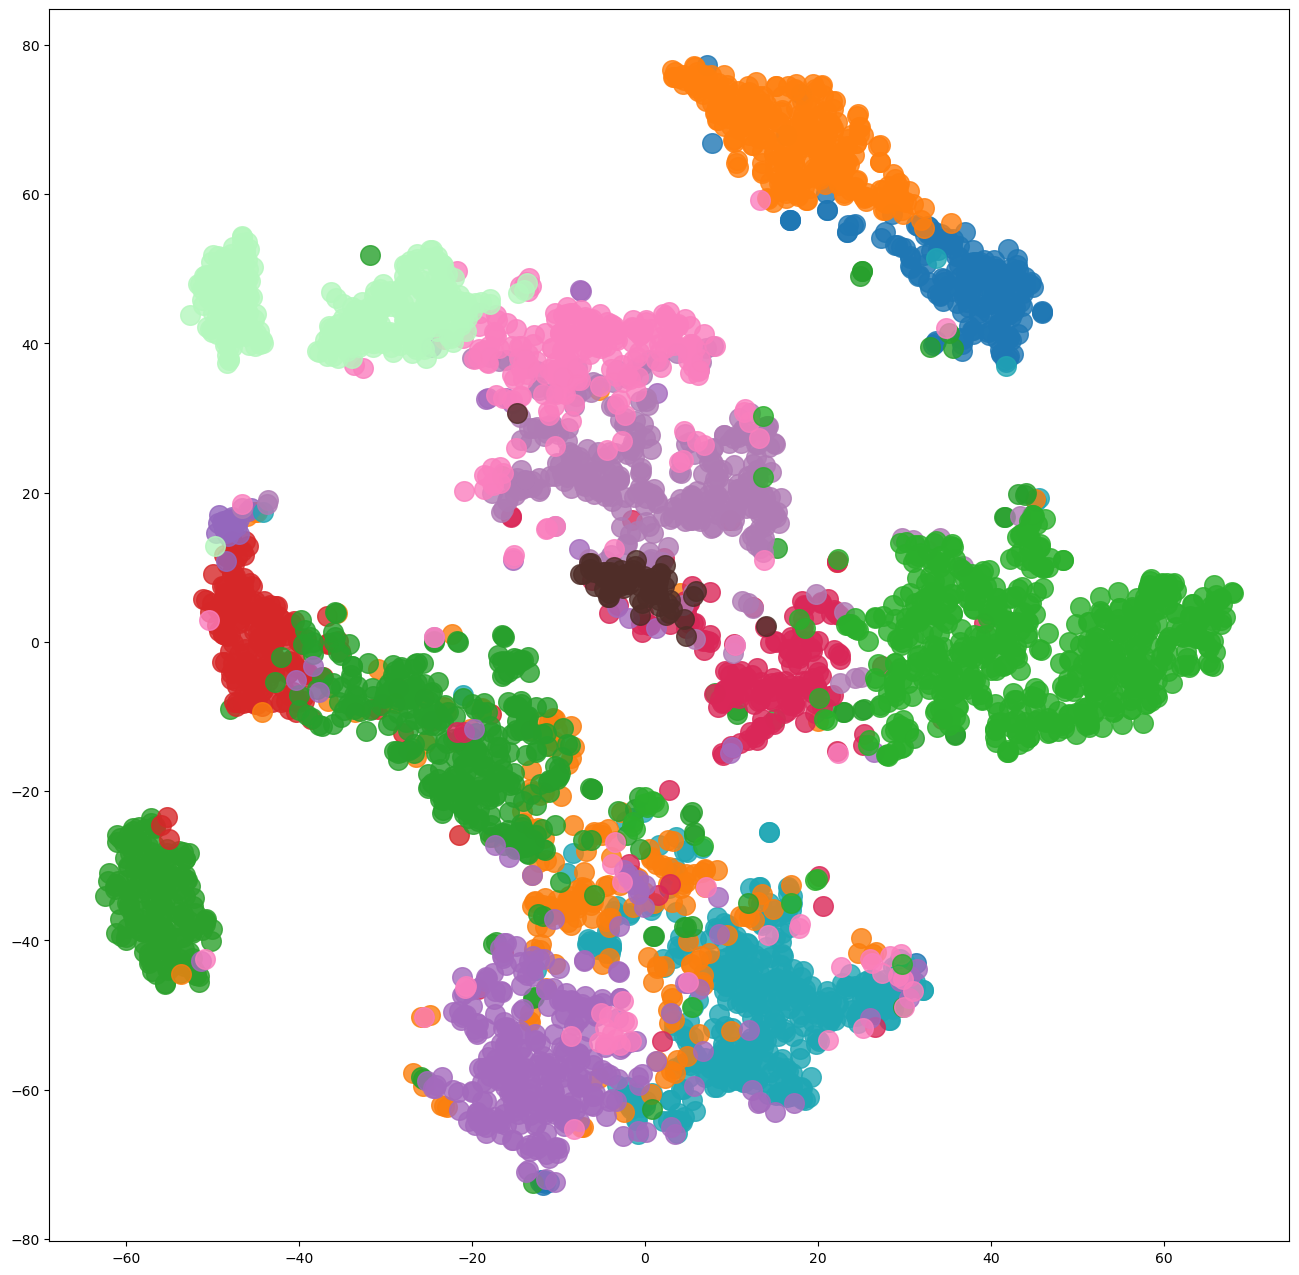

In [31]:
import os
import pandas as pd
import seaborn as sns
import torch
from torch import nn
import torchvision
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

path_data = 'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/emdebbing_generator_triplet_model1.h5",map_location=torch.device('cpu'))
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet_improved_Model.h5",map_location=torch.device('cpu'))



test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# تابع vis_tSNE برای نمایش ویژگی ها
def vis_tSNE(embeddings, labels, backbone='RVit'):
    # تغییر شکل embeddings به (n_samples, n_features)
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)  # تبدیل به ماتریس دو بعدی
    
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
#     plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    
val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)